In [1]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

In [2]:
train_path = '/data/kwf5687/elemnet/binary_data_label.csv'
# train_path = '/data/kwf5687/elemnet/train_set_nature.csv'
elements = ['H','Li','Be', 'B', 'C', 'N', 'O', 'F', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl',
            'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe','Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge',
            'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd',
            'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd',
            'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er','Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 
            'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu' ]
prop = 'delta_e'

In [3]:
data = pd.read_csv(train_path) 
# train_d, test_d = train_test_split(data, test_size=0.1, random_state=42)
# print(train_d.shape)
# print(test_d.shape)
X = data[elements]
Y = data[[prop]]
y_train = Y.iloc[:, 0].values
print(X.shape)
print(Y.shape)

(69445, 86)
(69445, 1)


In [4]:
import matplotlib.font_manager as font_manager
font_dirs = ["/home/kwf5687/arial"]  # The path to the custom font file.
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    print(font_file)
    font_manager.fontManager.addfont(font_file)

/home/kwf5687/arial/Arial.ttf


    correlation  abs_correlation
F     -0.350913         0.350913
C      0.213017         0.213017
Cl    -0.144822         0.144822
O     -0.136862         0.136862
S     -0.100001         0.100001
..          ...              ...
Li     0.002126         0.002126
Mg    -0.001562         0.001562
Ir    -0.001188         0.001188
Hf    -0.000508         0.000508
Xe    -0.000450         0.000450

[86 rows x 2 columns]


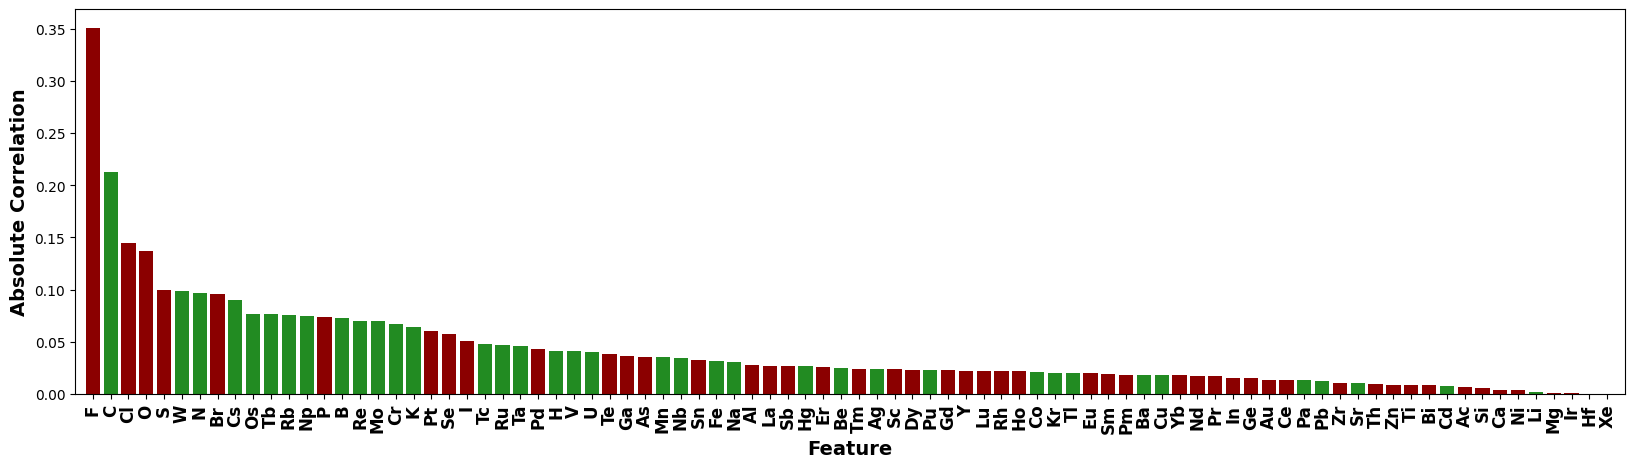

In [5]:
import matplotlib.pyplot as plt
data = pd.read_csv(train_path) 
X = data[elements]
Y = data[[prop]].squeeze()
correlation = X.corrwith(Y)
correlation_df = correlation.to_frame(name='correlation')
correlation_df['abs_correlation'] = correlation_df['correlation'].abs()
sorted_correlation = correlation_df.sort_values(by='abs_correlation', ascending=False)
print(sorted_correlation)
features = sorted_correlation.index.tolist()
colors = ['forestgreen' if x > 0 else 'darkred' for x in sorted_correlation['correlation']]
plt.figure(figsize=(20, 5))  # Adjust the figure size as needed to accommodate all features
plt.bar(range(len(features)), sorted_correlation['abs_correlation'], color=colors, align="center")
plt.xticks(range(len(features)), features, rotation=90, fontsize=12, fontweight='bold')
plt.xlim([-1, len(features)])
plt.xlabel("Feature", fontsize=14, fontweight='bold')
plt.ylabel("Absolute Correlation", fontsize=14, fontweight='bold')
plt.show()

In [6]:
# from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth = 100)
# dt = DecisionTreeRegressor()
dt.fit(X.values, y_train)
print(dt.get_depth())

100


In [7]:
y_pred_dt = dt.predict(X.values)
print(y_pred_dt)

[ 0.25740175  0.20560057  0.03016191 ...  0.01010394 -0.06468296
 -0.10915102]


In [8]:
mse = mean_squared_error(y_train, y_pred_dt)
print(f"Mean Squared Error: {mse:f}")
mae = mean_absolute_error(y_train, y_pred_dt)
print(f"Mean Absolute Error: {mae:f}")

Mean Squared Error: 0.001277
Mean Absolute Error: 0.012643


Text(0, 0.5, 'Importance')

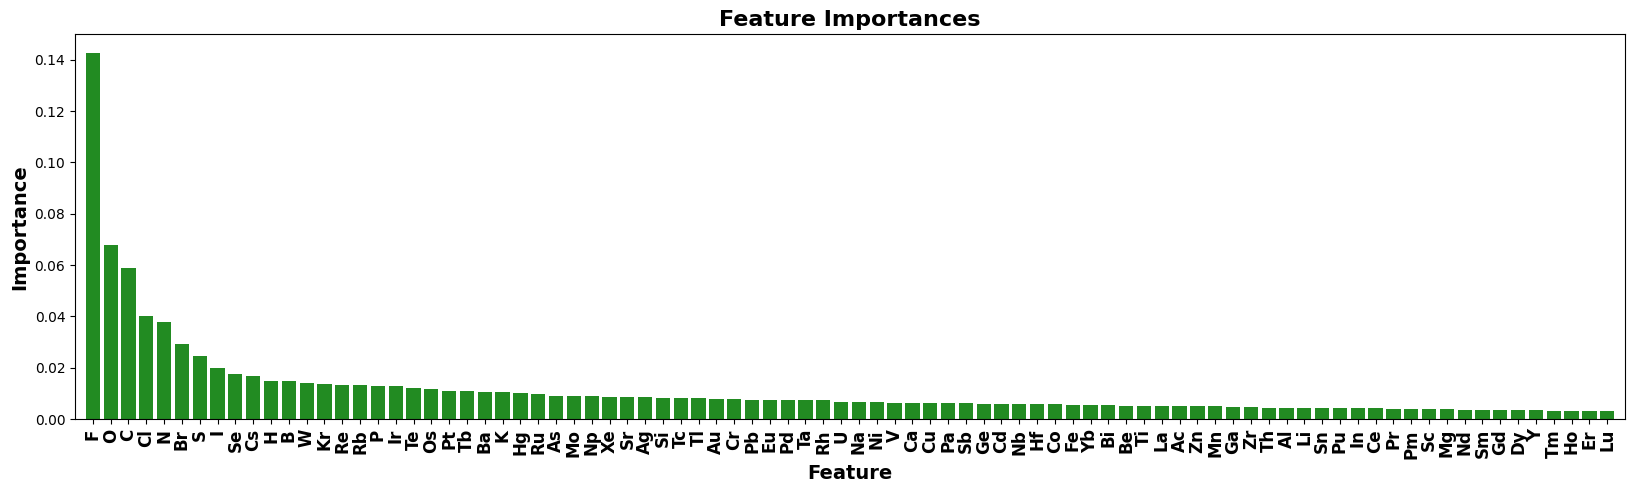

In [9]:
## show feature importances
import matplotlib.pyplot as plt
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = elements
sorted_feature_names = [feature_names[i] for i in indices]
plt.figure(figsize=(20,5))
plt.title("Feature Importances", fontsize=16, fontweight='bold')
plt.bar(range(X.shape[1]), importances[indices], color="forestgreen", align="center")
plt.xticks(range(X.shape[1]), sorted_feature_names, rotation=90, fontsize=12, fontweight='bold')
plt.xlim([-1, X.shape[1]])
plt.xlabel("Feature", fontsize=14, fontweight='bold')
plt.ylabel("Importance", fontsize=14, fontweight='bold')

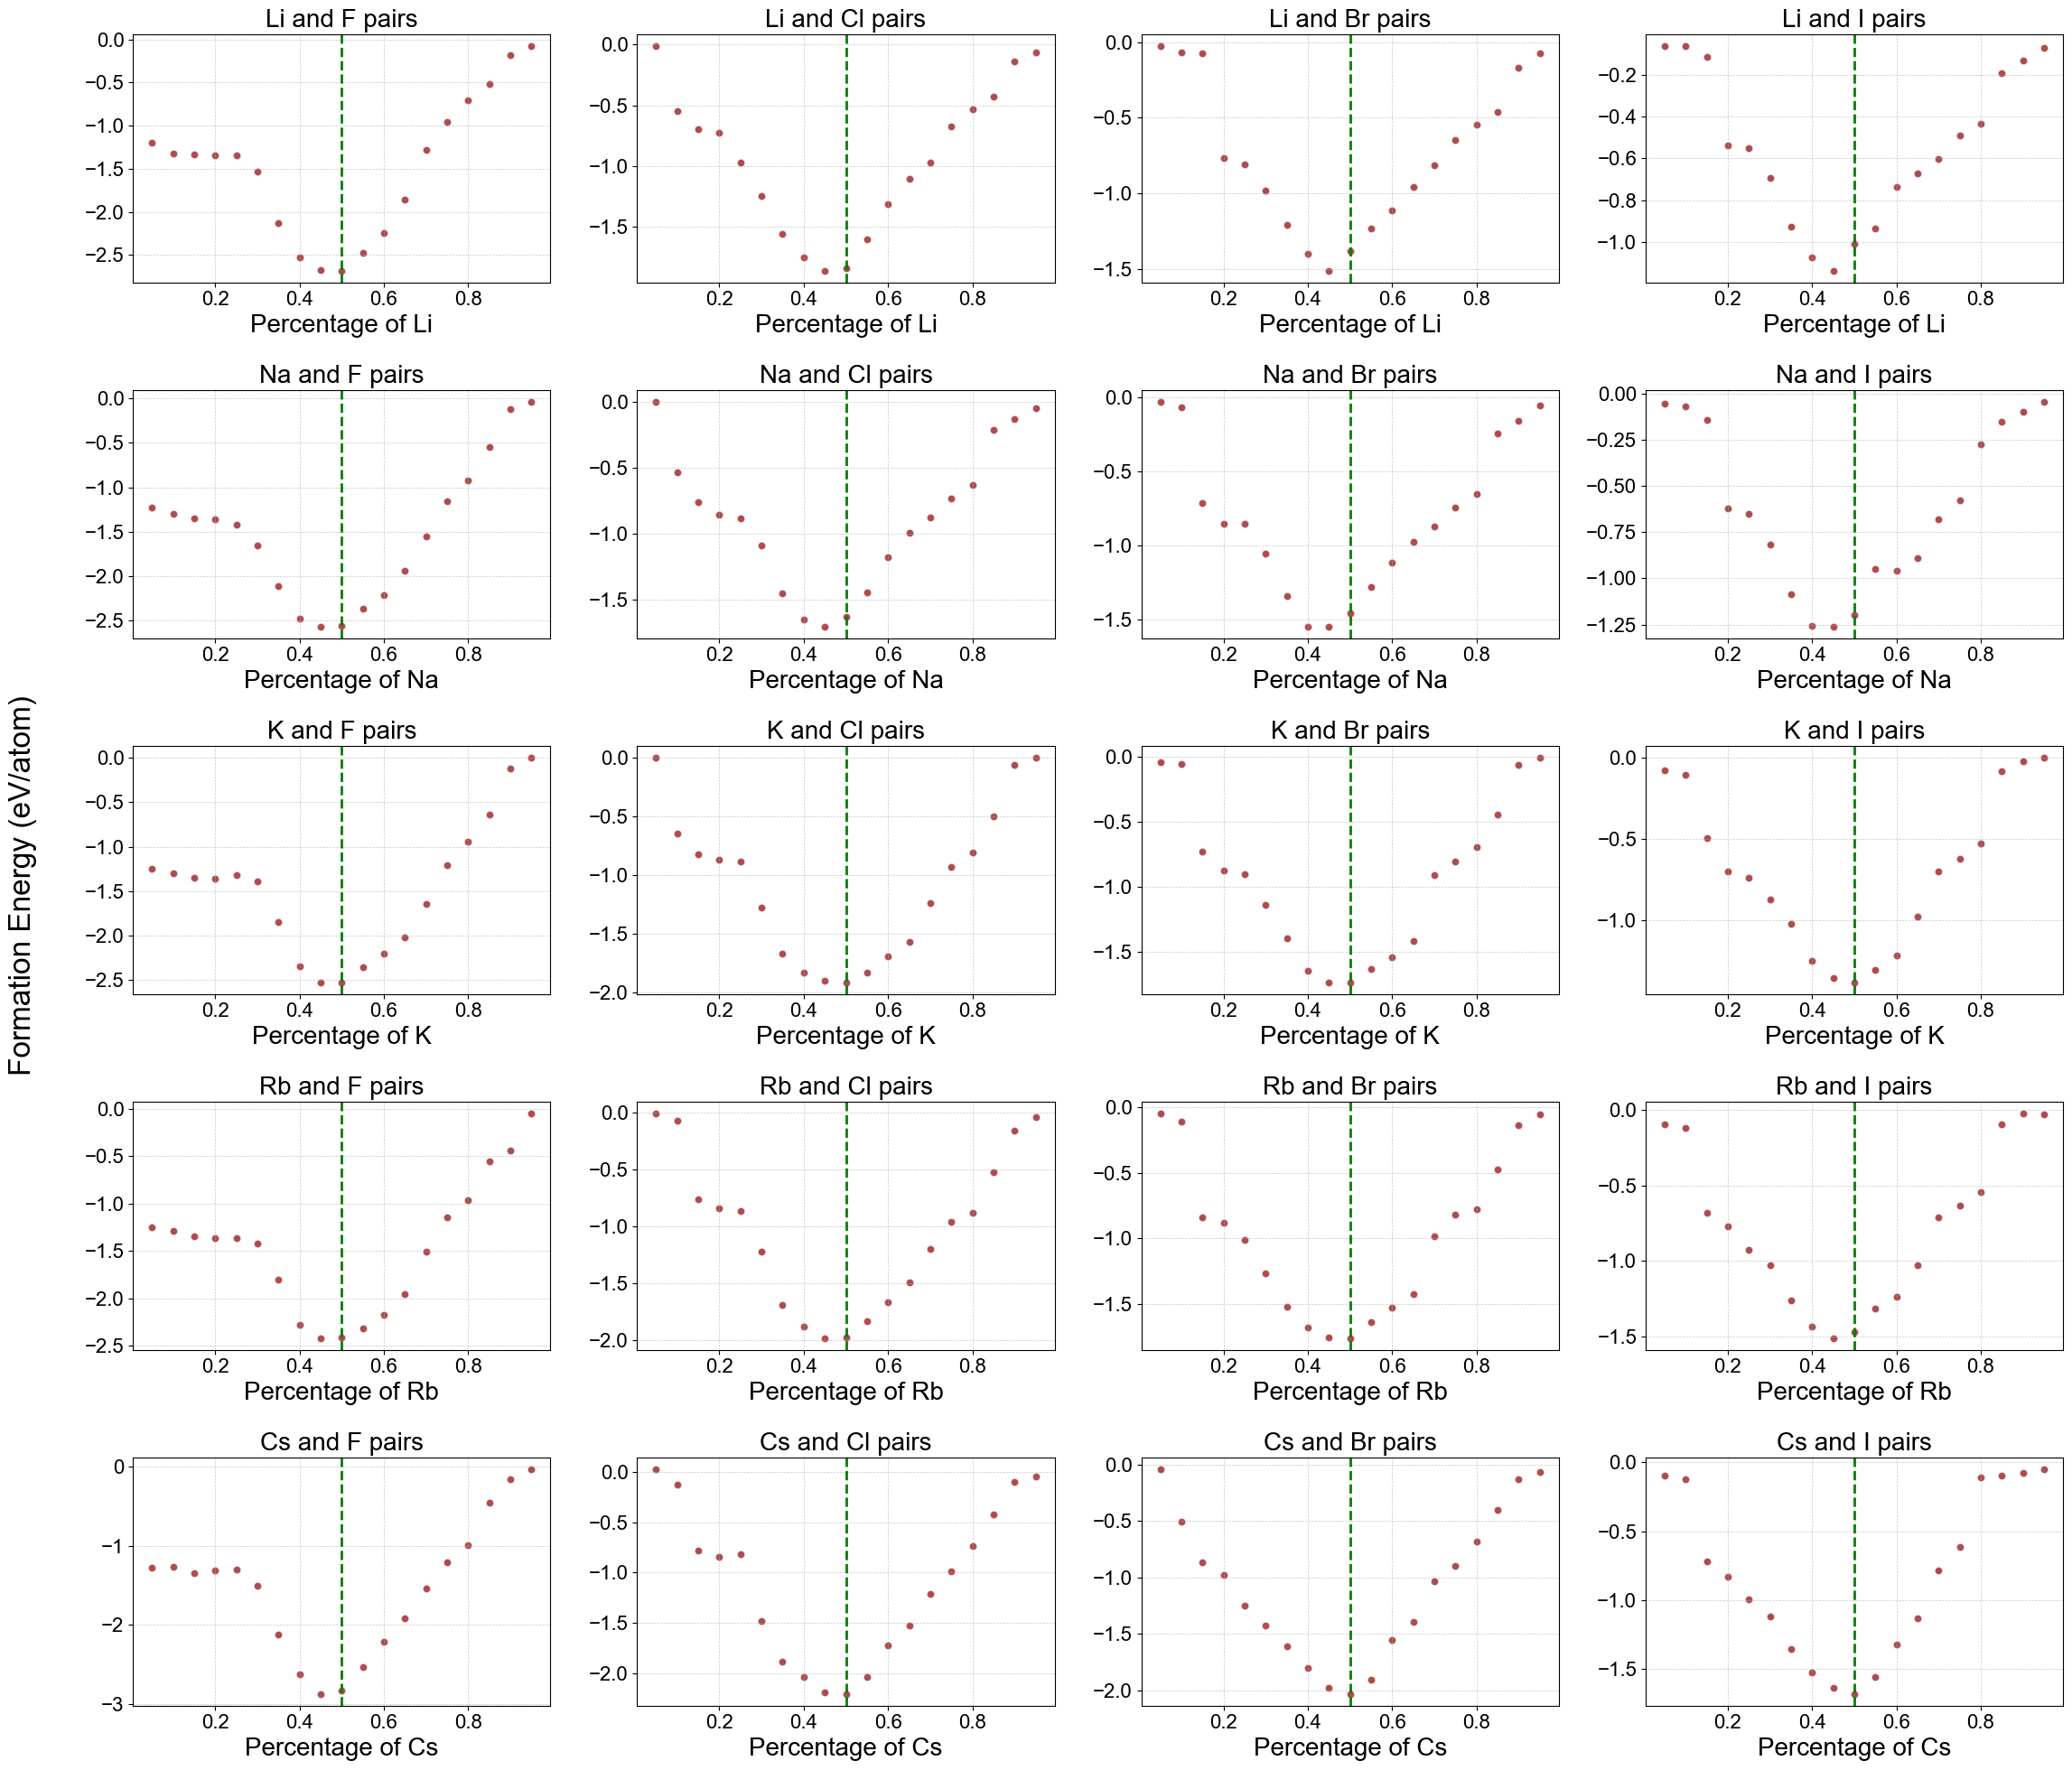

In [10]:
import matplotlib
group567_elements = ["F", "Cl", "Br", "I"]
# group567_elements = ["O", "S", "Se", "Te"]
# group567_elements = ["N", "P", "As", "Sb", "Bi"]
# group567_elements = ["N", "P", "As", "Sb"]
group123_elements = ["Li", "Na", "K", "Rb", "Cs"]
# group123_elements = ["Be", "Mg", "Ca", "Sr", "Ba"]
# group123_elements = ["B", "Al", "Ga", "In", "Tl"]

fig = plt.figure(figsize=(24, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.4) 
matplotlib.rcParams.update({'font.size': 20, 'font.family': 'Arial'})

for j, alkali_metal in enumerate(group123_elements, start=1):
    
    # Loop over group 6/7 elements for columns in each row
    for i, halogen in enumerate(group567_elements, start=1):
        
        # Calculate the subplot index
        ax_index = (j - 1) * len(group567_elements) + i
        
        # Create subplot for current alkali metal and halogen pair
        ax = plt.subplot(len(group123_elements), len(group567_elements), ax_index)
        
        # Filter data for non-zero values for both elements
        data_filtered = data[(data[alkali_metal] != 0) & (data[halogen] != 0)]
        # print(data_filtered.shape)
        
        # Extract relevant data
        alkali_halogen_df = data_filtered[[alkali_metal, 'delta_e']]
        
        # Plot scatter plot for the current element pair
        ax.scatter(alkali_halogen_df[alkali_metal], alkali_halogen_df['delta_e'], alpha=0.7, edgecolors='w', s=40, c='darkred')

        ax.axvline(x=0.50, color='green', linestyle='--', linewidth=2)
        
        # Customize the plot
        ax.set_xlabel('Percentage of ' + alkali_metal, fontsize=20, fontweight='bold')
        # if i == 1:  # Set y-axis label only for the first column
        #     ax.set_ylabel('Formation Energy (eV/atom)', fontsize=10, fontweight='bold')
        ax.set_title(alkali_metal + ' and ' + halogen + ' pairs', fontsize=20, fontweight='bold')
        
        ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
        ax.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout(rect=[0.07, 0, 1, 1])
plt.figtext(0.04, 0.5, 'Formation Energy (eV/atom)', fontsize=24, fontweight='bold', va='center', rotation='vertical')
# plt.tight_layout()
plt.show()

In [11]:
smallest_delta_e = data.nsmallest(1, 'delta_e').index[0]
smallest_delta_e
non_zero_columns = data.loc[smallest_delta_e, data.loc[smallest_delta_e] != 0]
non_zero_columns

F          0.750000
Ho         0.250000
delta_e   -4.273581
Name: 18444, dtype: float64

In [12]:
largest_delta_e = data.nlargest(1, 'delta_e').index[0]
largest_delta_e
non_zero_columns = data.loc[largest_delta_e, data.loc[largest_delta_e] != 0]
non_zero_columns

C          0.650000
Br         0.350000
delta_e    3.188753
Name: 3052, dtype: float64